# Exercise Lab: Developing Boosting Regression Models with scikit-learn (Using the digits Dataset)


### Objective

- Load and explore the Digits dataset.
- Implement regression boosting methods (AdaBoostRegressor and GradientBoostingRegressor).
- Tune hyperparameters.
- Compare performance against baseline models.
- Check the results.


### Step 1: Setup

Install required packages (if needed):

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

### Step 2: Load and Explore the Dataset

In [5]:
# Load the dataset

# the Digits dataset consists of 8x8 images of many numerical (0, 1, ..., 9) digits.
# each corresponding entry represents the shade value of the pixel.
# The goal is to train a model that read the digits from the image

digits = load_digits()
X = digits.data
y = digits.target
feature_names = digits.feature_names

print(feature_names)
# Convert to DataFrame for visualization
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name="target")

print(X_df.head(20))
print(y_df.head(20))

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
    pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0         0.0        0.0        5.0       13.0        9.0        1.0   
1         0.0        0.

Discussion: The data includes physical measurements predicting some exercise responses.

### Part 3: Visualize the Data (Optional)

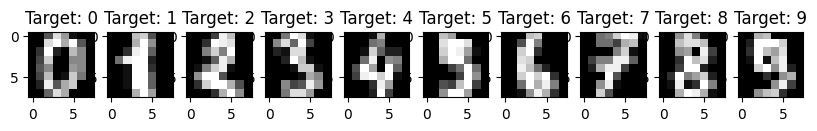

In [6]:
import matplotlib.pyplot as plt

# Visualize some example images from the dataset
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.data[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray, interpolation='nearest')
    plt.title(f'Target: {label}')
plt.show()

### Part 4: Prepare Data and Baseline Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Baseline classifier: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Baseline (Logistic Regression) Accuracy: {lr_accuracy:.2f}")



Baseline (Logistic Regression) Accuracy: 0.97


### Part 5: Implement Boosting Classification Models

##### 5.1: AdaBoostClassifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create base estimator
base_estimator = DecisionTreeClassifier(max_depth=4, random_state=42)

# AdaBoost with multiple estimators
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=55, learning_rate=.1, random_state=42)


# Fit model
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Evaluate, Print Accuracy
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")



AdaBoost Accuracy: 0.97


##### 5.2: GradientBoostingClassifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier with multiple estimators
gb = GradientBoostingClassifier(n_estimators=85, random_state=42)


# Fit model
gb.fit(X_train,y_train)
y_predgb = gb.predict(X_test)

# Evaluate, Print Accuracy
print(f"Gradient Boost Accuracy: {accuracy_score(y_test, y_predgb):.2f}")

Gradient Boost Accuracy: 0.97


### Part 6: Hyperparameter Tuning (Optional)

GridSearchCV can be used to find optimal hyperparameters. An outline is provided here:

Define Parameter Grid: Specify the range of hyperparameters you want to test.

In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 2, 3, 4]  # if customizing base estimator
}




Initialize and Configure GridSearchCV: Set up the grid search with cross-validation.

In [61]:
# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=85, random_state=42)


# Set up GridSearchCV
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)




Fit the Grid Search: Train models across the grid and find the best parameters.

In [62]:
# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


# Output the best parameters and highest cross-validation accuracy score
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
#print("Best cross-validation accuracy:", grid_search.best_score_)



Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.96


Evaluate Best Estimator: Use the best parameters found to predict and evaluate on the test set.

In [63]:
# Retrieve the best model
best_model = grid_search.best_estimator_


# Predict on the test set
y_pred = best_model.predict(X_test)


# Calculate and print the test set accuracy
print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.2f}")



Test set accuracy: 0.97


### Summary

Parameter Grid: Defines which hyperparameters to search over and their ranges, like n_estimators, learning_rate, and max_depth.

GridSearchCV: Performs an exhaustive search over the given parameter grid with cross-validation, identifying optimal parameters.

Evaluation: Leverages the optimal hyperparameters to predict test data accuracy, ensuring robust model evaluation.

This approach helps automate the hyperparameter optimization process, providing potentially improved performance over manually setting hyperparameters. 